In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
df_usr=pd.read_csv('takehome_users.csv',encoding='ISO-8859-1',parse_dates=[1]) # or encoding='latin1'

In [158]:
df_usr.sample(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
6902,6903,2012-10-02 20:58:44,Bryan Mia,MiaBryan@yahoo.com,ORG_INVITE,1.349212e+09,0,1,369,6903.0
3419,3420,2012-09-17 10:27:10,Jonathan Brayden,BraydenJonathan@jourrapide.com,ORG_INVITE,1.347878e+09,0,0,182,3643.0
11566,11567,2013-06-08 20:32:51,Kristoffersen Malou,MalouCKristoffersen@gmail.com,SIGNUP_GOOGLE_AUTH,1.377031e+09,1,1,157,NaN


In [159]:
df_usr[df_usr.duplicated(keep=0)] # testing if we have dup user ids. looks like we have none

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id


In [160]:
df_usr.isnull().sum() #checking for missing values

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [161]:
df_engage=pd.read_csv('takehome_user_engagement.csv',parse_dates=[0]) 

In [162]:
df_engage.head(10)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [163]:
df_engage[df_engage.duplicated(['user_id'],keep='first')].head(3)

,time_stamp,user_id,visited
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


# Observation:

We can see that we have duplicate user id, which is a good sign.

In [164]:
df_engage.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

## Adopted User:
Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven day  period ,  identify  which  factors  predict  future  user
adoption .

In [165]:
df_engage.set_index('time_stamp', inplace=True) 
# this step ( time as index) will help us to do time series calculations

In [166]:
df_adopted=(df_engage.groupby('user_id')
                    .resample('W-SUN')
                    .agg({"visited":'sum'})
                    .reset_index()
                    .dropna(subset=['visited']))

In [167]:
df_adopted=df_adopted[df_adopted.visited>=3].drop_duplicates(subset='user_id',keep='last')

In [168]:
df_adopted.head(3)

,user_id,time_stamp,visited
13,2,2014-02-09,3.0
98,10,2014-06-01,7.0
106,20,2014-03-16,3.0


In [170]:
df_usr['adopted']=0
df_usr=df_usr.reindex()

In [171]:
df_usr.loc[df_usr.object_id.isin(df_adopted.user_id),['adopted']] = 1 #if the user id is present then adopted=true

In [172]:
df_usr.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0


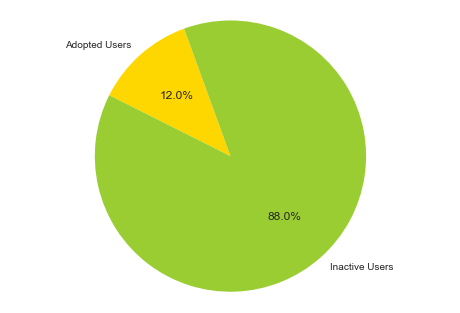

In [173]:
# Data to plot
labels = 'Adopted Users', 'Inactive Users'
sizes = [len(df_usr[df_usr.adopted==1]),len(df_usr[df_usr.adopted==0])]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
# Plot
plt.pie(sizes,  labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=0, startangle=110)
plt.axis('equal')
plt.show()

In [174]:
df_usr.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

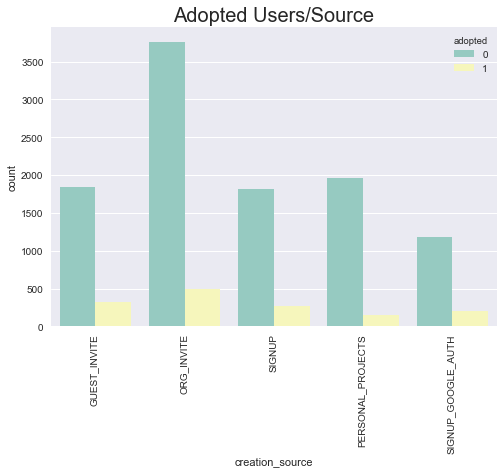

In [175]:
import seaborn as sns
sns.countplot(data=df_usr, x='creation_source', hue='adopted',palette="Set3")
plt.title('Adopted Users/Source', fontsize=20)
plt.xticks(rotation='vertical')
#plt.figure(figsize=(10, 18))
plt.show()

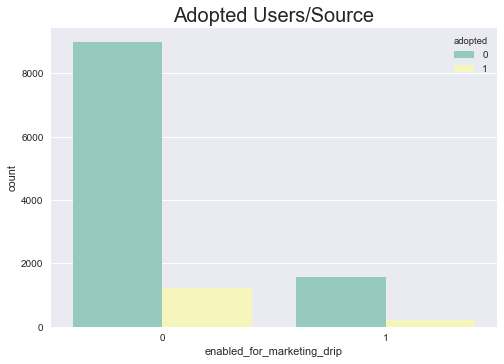

In [176]:
sns.countplot(data=df_usr, x='enabled_for_marketing_drip', hue='adopted',palette="Set3")
plt.title('Adopted Users/Source', fontsize=20)
#plt.figure(figsize=(10, 18))
plt.show()

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### We are only considering columns which makes sense

In [ ]:
df_transformed=df_usr[['creation_source','opted_in_to_mailing_list',\
                       'enabled_for_marketing_drip','invited_by_user_id','adopted']]

source_dict=dict(zip(df_transformed['creation_source']
                     .unique(),np.arange(0,len(df_transformed['creation_source']
                                               .unique()))))
df_transformed['invited_by_user_id']=df_transformed.invited_by_user_id.apply(lambda x: 1 if x>0 else 0)
df_transformed.creation_source=df_transformed.creation_source.apply(lambda x: source_dict[x])

In [231]:
X=df_transformed.drop(['adopted'],axis=1)
y=df_transformed['adopted']

In [232]:
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=.3)

In [233]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(clf_rf.predict(X_test), y_test))

0.880277777778


In [235]:
from sklearn.model_selection import GridSearchCV
#using grid search techquine 
param_grid = {'n_estimators': np.arange(10,50,10),
              'min_samples_leaf': np.arange(1,50,10),
              'max_features': ['auto', 'sqrt', 'log2']}

clf_rf = RandomForestClassifier()
clf_rf_cv = GridSearchCV(clf_rf, param_grid, cv=5,scoring="accuracy")
clf_rf_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print('------------GridSearchCV--------')
print("Tuned Random Forest Parameters: {}".format(clf_rf_cv.best_params_)) 
print("Best score is {}".format(clf_rf_cv.best_score_))

------------GridSearchCV--------
Tuned Random Forest Parameters: {'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 10}
Best score is 0.8792857142857143


In [236]:
#best param model
clf_rf = RandomForestClassifier(n_estimators=10,
                            min_samples_leaf=1,
                            max_features='auto')

clf_rf.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(clf_rf.predict(X_test), y_test))

0.880277777778


In [241]:
pd.DataFrame({'Features':X_test.columns, 'Significance':clf_rf.feature_importances_})


,Features,Significance
0,creation_source,0.694704
1,opted_in_to_mailing_list,0.159105
2,enabled_for_marketing_drip,0.096654
3,invited_by_user_id,0.049537


# Conclusion:
We can see that Creation Source followed by Mailing Opt In( Marketing) plays a significant role in adoption.
    